# Web Scraping in Python

Please make sure you signed in.

## Introduction

Web Scraping is a very useful method used by data scientists to gather data from websites. This workshop will introduce the basics of web scraping and review common web scraping methodologies. Although there are many different ways to scrape data from websites we will cover some o the most popularly used libraries that python has to offer

## How to stay out of jail

Web Scraping is one of those legal gray areas (sadly). Make sure the site you are scraping is public domain, other wise make sure you have approval from the site's owner. Even with public domain be careful as sometimes your web scrape can overlook a site's terms of agreement. 

Ex.) LinkedIn vs. Doe Defendants. LinkedIn is suing 100 anonymous users for the following violations:

-Computer Fraud and Abuse Act (CFAA)

-California Penal Code

-Digital Millennium Copyright Act (DMCA)


A lot of web scraping/crawling rules will be listed in a sites robots.txt file which I will show you how to access. One example of restricion would be the crawl rate which tell you how many request you can per minute. This is to keep your crawl from overloading the server (simply add a delay of 10 sec between requests in code)

## HTML Basics Review

HTML stands for Hypertext Markup Language. 

It is used to describe the structure of web pages. It uses HTML elements that are represented by tags. This are a few of the HTML elements that are available but there are many more that can be used. Familiarity with different tags and thier functions are good know, but it is not as important as knowing the structure of HTML.

The following is an example of the HTML code structure:

In [ ]:
#   <!DOCTYPE html>
#   <html>
#      <head>
#          <title>Page Title</title>
#      </head>
#      <body>
#         <h1>My First Heading</h1>
#         <p>My first paragraph.</p>
#         <input type="button" onclick="location.href='http://google.com'" value="Go to Google">
#      </body>
#   </html>

## Import Modules

Here there are two important libraries we will be using. BeautifulSoup allows us to work with HTML easily. The second is requests which we will use to gather the HTML from the website of our choice.

In [1]:
from bs4 import BeautifulSoup as bs      # importing the BeautifulSoup: Helps parse and "beautify" HTML 
import requests as req                      # importing the urlopen: Helps make web client to sites.

If you get an error when running this block, you may not have the bs4 library installed. To do this open up Anaconda Prompt (or Terminal if on Mac) and type <code>pip install beautifulsoup4</code>

## Making a Request

This is how to make a request and download the HTML from the website. We will be using Wikipedia for our example as it is a fairly easy site to scrape from. Lets use the machine learning wiki at: https://en.wikipedia.org/wiki/Machine_learning

In [5]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'
results = req.get(url)
print(type(results))
results.text
# the .text attribute shows the text stores in this req object.

<class 'requests.models.Response'>


'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Machine learning - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":866356505,"wgRevisionId":866356505,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists having no precise inclusion criteria from April 2018","All lists having no precise inclusion criteria","All articles with unsourced statements","Articles with unsourced statements from August 2017","Machine learning","Cybernetics","Learning"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageCon

## Basics of BeatifulSoup4 

So we now have a variable 'results' that basically spits out the HTML from this website. This is kind of daunting and unhelpful but luckily we can use BeautifulSoup for this. This library is essentially an HTML "beautifier" that makes working with HTML bearable.

Now lets convert our object to type requests to one of type bs4.

In [7]:
soup = bs(results.text, 'lxml')
print(type(soup))
soup

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":866356505,"wgRevisionId":866356505,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists having no precise inclusion criteria from April 2018","All lists having no precise inclusion criteria","All articles with unsourced statements","Articles with unsourced statements from August 2017","Machine learning","Cybernetics","Learning"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel

### Select

We can select certain tags from HTML. Helpful to use the HTML inspector in a web browser like Chrome or Safari. In this case let's select all the headers on the page so we can see the different topics that the wiki page contains. Select will pull all the items given the tag and put them into an array.

In [9]:
# Selecting all the headlines
soup.select('.mw-headline')
# print(type(soup.select(".mw-headline")[0]))

[<span class="mw-headline" id="Overview">Overview</span>,
 <span class="mw-headline" id="Machine_learning_tasks">Machine learning tasks</span>,
 <span class="mw-headline" id="Machine_learning_applications">Machine learning applications</span>,
 <span class="mw-headline" id="History_and_relationships_to_other_fields">History and relationships to other fields</span>,
 <span class="mw-headline" id="Relation_to_statistics">Relation to statistics</span>,
 <span class="mw-headline" id="Theory"><span id="Generalization"></span> Theory</span>,
 <span class="mw-headline" id="Approaches">Approaches</span>,
 <span class="mw-headline" id="Decision_tree_learning">Decision tree learning</span>,
 <span class="mw-headline" id="Association_rule_learning">Association rule learning</span>,
 <span class="mw-headline" id="Artificial_neural_networks">Artificial neural networks</span>,
 <span class="mw-headline" id="Deep_learning">Deep learning</span>,
 <span class="mw-headline" id="Inductive_logic_programmi

In [12]:
# List all the titles in readable format
print(type(soup.select('.mw-headline')))
print(type(soup.select('.mw-headline')[0]))
print(soup.select('.mw-headline')[0])

<class 'list'>
<class 'bs4.element.Tag'>
<span class="mw-headline" id="Overview">Overview</span>


In [13]:
for x in soup.select('.mw-headline'):
    print(x.text)

Overview
Machine learning tasks
Machine learning applications
History and relationships to other fields
Relation to statistics
 Theory
Approaches
Decision tree learning
Association rule learning
Artificial neural networks
Deep learning
Inductive logic programming
Support vector machines
Clustering
Bayesian networks
Representation learning
Similarity and metric learning
Sparse dictionary learning
Genetic algorithms
Rule-based machine learning
Learning classifier systems
Applications
Limitations
Bias
Model assessments
Ethics
Software
Free and open-source software
Proprietary software with free and open-source editions
Proprietary software
Journals
Conferences
See also
References
Further reading
External links


## Web Scraping for Real

Now that we have the basics, lets try web scraping a real site! With permission of course. Lets use this website we are allowed to scrape. Here is the link: http://books.toscrape.com/catalogue/category/books_1/index.html

In [14]:
url = 'http://books.toscrape.com/catalogue/category/books_1/index.html'
results = req.get(url)
soup = bs(results.text, 'lxml')
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    Books | 
     Books to Scrape - Sandbox

</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    
" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../../../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../../../static/oscar/css/styles.css" rel="stylesheet" type="text/c

**Lets get all the product information we can. Seems like each item is separated into a "product_pod"**

In [16]:
products = soup.select('.product_pod')
products

[<article class="product_pod">
 <div class="image_container">
 <a href="../../a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../../../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="../../a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>, <article class="product_pod">
 <div class="image_container">
 <a href="../../tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbn

**Scraping titles**

In [17]:
titles = [x.text for x in soup.find_all('h3')]
titles

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

**Scraping prices**

In [22]:
price = [x.text[2:] for x in soup.find_all('p', attrs = {'class': 'price_color'})]
price

['51.77',
 '53.74',
 '50.10',
 '47.82',
 '54.23',
 '22.65',
 '33.34',
 '17.93',
 '22.60',
 '52.15',
 '13.99',
 '20.66',
 '17.46',
 '52.29',
 '35.02',
 '57.25',
 '23.88',
 '37.59',
 '51.33',
 '45.17']

**Scraping availability**

In [24]:
instock = [x.text[15:23] for x in soup.find_all('p', attrs = {'class': 'instock availability'})]
instock

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

### Scraping multiple pages

Sadly there isn't really an easy function to do this. Atleast none that I have seen

In [25]:
# We can't easily include the first page in the link becasue it has "index.html" rather than the regular file

# Loops through a formatted url string. Will take a while to run

for page in range(2,51):
    url = 'http://books.toscrape.com/catalogue/category/books_1/page-'+str(page)+'.html'
    results = req.get(url)
    soup = bs(results.text, 'lxml')
    titles.extend([x.text for x in soup.find_all('h3')])
    price.extend([x.text[2:] for x in soup.find_all('p', attrs = {'class': 'price_color'})])
    instock.extend([x.text[15:23] for x in soup.find_all('p', attrs = {'class': 'instock availability'})])


In [26]:
titles

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas",
 'In Her Wake',
 'How Music Works',
 'Foolproof Preserving: A Guide ...',
 'Chase Me (Paris Nights ...',
 'Black Dust',
 'Birdsong: A Story in ...',
 "America's Cradle of Quarterbacks: ...",
 'Aladdin and His Wonderful ...',
 'Worlds Elsewhere: Journeys Around ...',
 'Wall and Piece',
 'The Four Agreements: A ...',
 'The Five Love Languages: ...',
 'The Elephant Tree',
 'The Bear and the ...',
 "Sophie's World",
 'Penny Maybe',
 'Maude (1883-1993):She Grew Up ...',
 'In a Dark, Da

### Creating your data

Now that we have retrieved our data lets create our dataframe and do some cleaning

In [28]:
import pandas as pd

d = {'titles': titles, 'price': price, 'availability': instock}
books = pd.DataFrame(data = d)
books.head()

,titles,price,availability
0,A Light in the ...,51.77,In stock
1,Tipping the Velvet,53.74,In stock
2,Soumission,50.10,In stock
3,Sharp Objects,47.82,In stock
4,Sapiens: A Brief History ...,54.23,In stock


In [29]:
# Remember that the prices were store as Strings
print(type(books['price'][0]))


<class 'str'>


In [30]:
# Lets clean this real quick
books['price'] = [float(x) for x in books['price']]
books['price'].describe()

count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: price, dtype: float64

### Visualization

Lets make a boxplot of all the prices to check for outliers

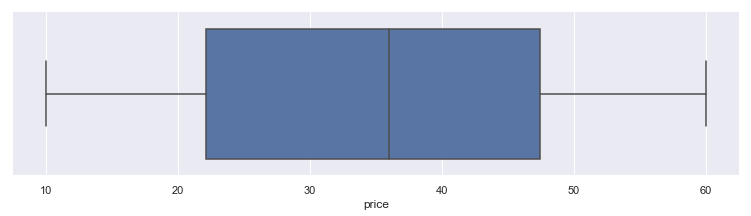

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'darkgrid', color_codes = True)
f, ax = plt.subplots(figsize=(13, 3))
sns.despine(f, left=True, bottom=True)

boxplt = sns.boxplot(books['price'])

AxesSubplot(0.125,0.11;0.775x0.77)


## Thank You for Coming!

Visit us at https://www.dsiufl.org